# Tutorial 2: An Introduction to the ccdproc package and to image combination

### Further reading:

The ccdproc reference doc:
https://ccdproc.readthedocs.io/

Image reduction cookbook:
https://www.astropy.org/ccd-reduction-and-photometry-guide/v/dev/index.html


# Load the packages

In [9]:
# Support Posix paths. Takes care of OS specific paths.
from pathlib import Path

# The usual libs
import numpy as np
import matplotlib.pyplot as plt

# Astropy
# The tools in ccdproc accept only CCDData objects
from astropy.nddata import CCDData

from astropy.stats import mad_std
from astropy.modeling import models
from astropy.io import fits

#ccdproc
import ccdproc as ccdp
from ccdproc import ImageFileCollection



# **Calcular o ganho e ruído do CCD**

In [12]:
read_path = Path('gainNoise')
write_path = Path('ProcGainNoise')
write_path.mkdir(exist_ok=True)

imcol = ImageFileCollection(read_path)

for ccd, file_name in imcol.ccds(ccd_kwargs={'unit': 'adu'}, # CCDData requires a unit for the image if 
                                                             # it is not in the header
                                 return_fname=True           # Provide the file name too.
                                ):
    # Subtract the overscan
    ccd = ccdp.subtract_overscan(ccd, fits_section='[1030:1068,:]', median=True, overscan_axis=1)
    # Trim the overscan
    ccd = ccdp.trim_image(ccd, fits_section='[1:1024, 1:1024]')
    # Save the result
    ccd.write(str(write_path)+'/OT_'+file_name, overwrite=True)

proc_imcol = ImageFileCollection(write_path)
#for ccd, file_name in proc_imcol.ccds(ccd_kwargs={'unit': 'adu'}, return_fname=True):
        

IndentationError: expected an indented block (400622874.py, line 21)

# Introducing ImageFileCollection: lists of images in a directory

In [13]:
read_path = Path('0_mainData')
write_path = Path('proc')
write_path.mkdir(exist_ok=True)  # create the directory if it doesn't exist

#Make an image file collection for the raw data
imcol = ImageFileCollection(read_path)  

#imcol.summary.colnames 
#imcol.summary['file']
#imcol.summary['file', 'imagetyp', 'object', 'filter', 'exptime']
#list_flatI = imcol.files_filtered(filter='I', imagetyp='FLAT')
#imcol_flatI = imcol.filter(filter='I', imagetyp='FLAT')

In [3]:
#imcol_flatI.location
imcol.location

PosixPath('0_mainData')

In [5]:
#imcol.summary
imcol.summary['file', 'imagetyp', 'biassec', 'ccdsec', 'datasec']

file,imagetyp,biassec,ccdsec,datasec
str10,str6,str18,str15,str15
3241o.fits,OBJECT,"[1025:1072,1:1024]","[1:1024,1:1024]","[1:1024,1:1024]"
3249o.fits,OBJECT,"[1025:1072,1:1024]","[1:1024,1:1024]","[1:1024,1:1024]"
3262o.fits,OBJECT,"[1025:1072,1:1024]","[1:1024,1:1024]","[1:1024,1:1024]"
3265o.fits,OBJECT,"[1025:1072,1:1024]","[1:1024,1:1024]","[1:1024,1:1024]"
4015b.fits,BIAS,"[1025:1072,1:1024]","[1:1024,1:1024]","[1:1024,1:1024]"
4016b.fits,BIAS,"[1025:1072,1:1024]","[1:1024,1:1024]","[1:1024,1:1024]"
4017b.fits,BIAS,"[1025:1072,1:1024]","[1:1024,1:1024]","[1:1024,1:1024]"
4075f.fits,FLAT,"[1025:1072,1:1024]","[1:1024,1:1024]","[1:1024,1:1024]"
4076f.fits,FLAT,"[1025:1072,1:1024]","[1:1024,1:1024]","[1:1024,1:1024]"


# Subtract overscan and trim 

Note the difference in indexing between the python and fits conventions. Check the "Indexing: python and FITS" section at https://ccdproc.readthedocs.io/en/latest/reduction_toolbox.html#reduction-toolbox


In [14]:
for ccd, file_name in imcol.ccds(ccd_kwargs={'unit': 'adu'}, # CCDData requires a unit for the image if 
                                                             # it is not in the header
                                 return_fname=True           # Provide the file name too.
                                ):
    # Subtract the overscan
#    ccd = ccdp.subtract_overscan(ccd, overscan=ccd[:, 1030:1068], median=True)
    ccd = ccdp.subtract_overscan(ccd, fits_section='[1030:1068,:]', median=True, overscan_axis=1)
#    poly_model = models.Polynomial1D(0)
#    ccd = ccdp.subtract_overscan(ccd, fits_section='[1030:1068,:]', model=poly_model, overscan_axis=1)

    # Trim the overscan
#    ccd = ccdp.trim_image(ccd[:, :1024])
    ccd = ccdp.trim_image(ccd, fits_section='[1:1024, 1:1024]')
    
    # Save the result
    ccd.write(str(write_path)+'/OT_'+file_name, overwrite=True)

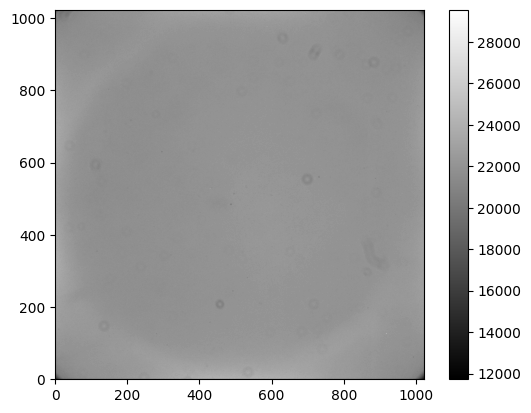

In [7]:
#Show last image
plt.imshow(ccd.data, cmap='gray', origin='lower')
plt.colorbar()

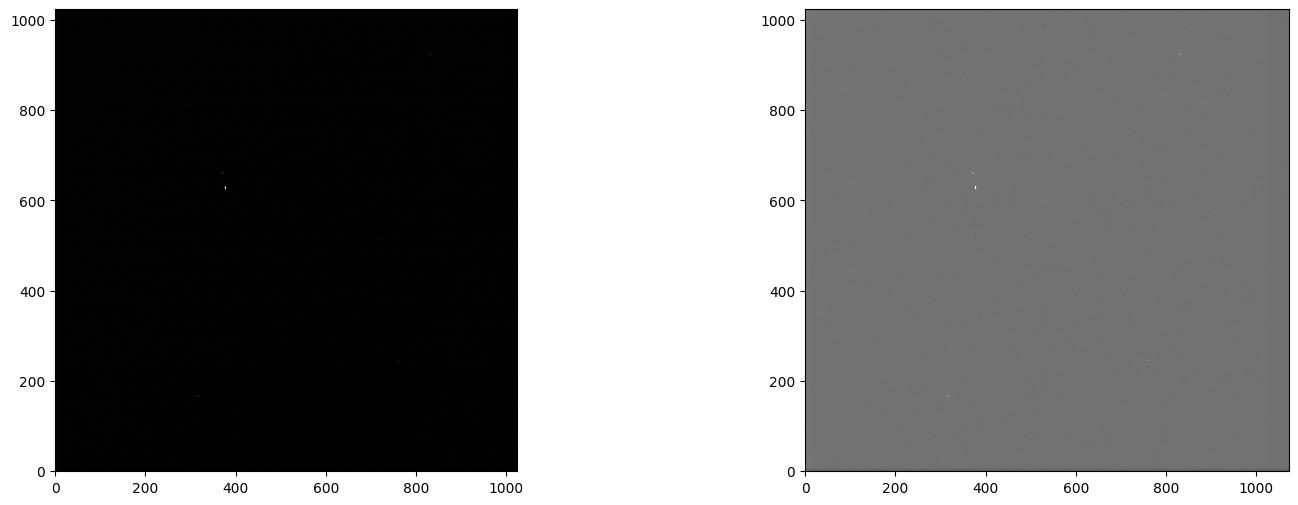

In [35]:
# select one of the bias images you just processed and compare with the raw image
# Use two side-by-side plots analogous to the one above
# Hint: you can create a CCDData object with CCDData.read(path_to_file) and then use the "data" attribute

## Processed data
processed_file = 'OT_4015b.fits'
hdu_list_processed = fits.open(str(write_path)+'/'+processed_file)
processed_data = hdu_list_processed[0].data

## Raw data
raw_file = '4015b.fits'
hdu_list = fits.open(str(read_path)+'/'+raw_file)
raw_data = hdu_list[0].data

#Plot the bias images
nrow=1
ncol=2
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(nrow,ncol,1)
plt.imshow(processed_data, cmap='gray', vmin=0, vmax=1000, origin='lower')
ax = fig.add_subplot(nrow,ncol,2)
plt.imshow(raw_data, cmap='gray', vmin=0, vmax=1000, origin='lower')

# Combine images: average with rejection

Full documentation on the combine function: https://ccdproc.readthedocs.io/en/latest/api/ccdproc.combine.html#ccdproc.combine

In [15]:
# In this example we'll average combine the bias images we have just processed
reduced_images = ImageFileCollection(write_path, glob_include='OT_*')
#reduced_images.summary['file', 'imagetyp', 'object', 'filter', 'exptime']
list_bias = reduced_images.files_filtered(imagetyp='bias',include_path=True)
list_bias

['proc/OT_4015b.fits', 'proc/OT_4016b.fits', 'proc/OT_4017b.fits']

In [16]:
Zero = ccdp.combine(list_bias,
                             method='average',
                             sigma_clip=True, sigma_clip_low_thresh=5, sigma_clip_high_thresh=5,
                             sigma_clip_func=np.ma.median, sigma_clip_dev_func=mad_std,
                             mem_limit=350e6
                            )

Zero.meta['combined'] = True

Zero.write(write_path / 'Zero.fits', overwrite=True)

In [17]:
# Now compare the combined bias with the original. Use a smaller section to avoid edges and spurious high counts
print('Combined:', Zero.data[100:200,100:200].std())

ic_bias = reduced_images.filter(imagetyp='bias')
for ccd in ic_bias.ccds():
    print(ccd.data[100:200,100:200].std())


Combined: 3.0609072431406856


4.8464339456965675
4.8039452078474
4.843412225900249


# Subtract the master bias from the object and flat images

In [13]:
# Lets read the Zero.fits file from disk
Zero = CCDData.read(write_path / 'Zero.fits')
#OTZ = ccdproc.subtract_bias(list_OTZ, Zero)

In [14]:
# If necessary, rebuild the image collection
reduced_images = ImageFileCollection(write_path, glob_include='OT_*')
# Now select just the the flats and object images
#list_OTZ = reduced_images.files_filtered(regex_match=True, imagetyp='object|flat',include_path=True)
#list_OTZ

ic_OTZ = reduced_images.filter(regex_match=True, imagetyp='object|flat')


In [15]:

for ccd, file_name in ic_OTZ.ccds(return_fname=True):
    ccd = ccdp.subtract_bias(ccd, Zero)

    ccd.header['zerocor'] = 'Zero.fits'

    # Save the result
    ccd.write(str(write_path)+'/Z'+file_name, overwrite=True)